__Imaging DATA__

In this example, we'll use the 'imaging' module to simulate imaging of a strong lens made using a tracer. By simulate, we mean that it will appear as if we had observed it using a real telescope, with this example making an image representative of Hubble Space Telescope imaging.

In [2]:
import autolens as al
import autolens.plot as aplt
%matplotlib inline

To simulate an image, we need to model the telescope's optics. We'll do this by convolving the image with a Point-Spread Function, which we can simulate as a Gaussian using the abstract data module.

In [9]:
psf = al.kernel.from_gaussian(shape_2d=(11, 11), sigma=0.1, pixel_scales=0.1)

To simulate imaging instrument, we use a grid, like usual.

In [4]:
grid = al.grid.uniform(
    shape_2d=(100, 100), pixel_scales=0.1, sub_size=2
)

Now, lets setup our lens galaxy, source galaxy and tracer.

In [10]:
lens_galaxy = al.Galaxy(
    redshift=0.5,
    mass=al.mp.EllipticalIsothermal(
        centre=(0.0, 0.0), einstein_radius=1.6, axis_ratio=0.7, phi=45.0
    ),
)

source_galaxy = al.Galaxy(
    redshift=1.0,
    light=al.lp.EllipticalSersic(
        centre=(0.1, 0.1),
        axis_ratio=0.8,
        phi=45.0,
        intensity=1.0,
        effective_radius=1.0,
        sersic_index=2.5,
    ),
)

tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])

Lets look at the tracer's image - this is the image we'll be simulating.

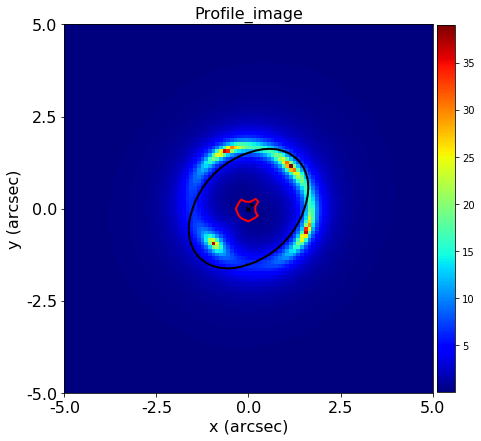

In [11]:
aplt.tracer.profile_image(tracer=tracer, grid=grid)

To Simulate the Imaging data, we don't use the image plotted above. Instead, we use an image which has been generated  specifically for simulating an image, which pads the array it is computed on based on the shape of the PSF we  convolve the image with. This ensures edge-effects do not degrade our simulation's PSF convolution.

In [7]:
normal_image = tracer.profile_image_from_grid(grid=grid)
padded_image = tracer.padded_profile_image_from_grid_and_psf_shape(
    grid=grid, psf_shape_2d=psf.shape_2d
)
print(normal_image.shape)
print(padded_image.shape)

(40000,)
(48400,)


Now, to simulate the imaging data, we pass the tracer and grid to the imaging module's simulate function. This adds the following effects to the image:

1) Telescope optics: Using the Point Spread Function above.
2) The Background Sky: Although the image that is returned is automatically background sky subtracted.
3) Poisson noise: Due to the background sky, lens galaxy and source galaxy Poisson photon counts.

In [12]:
simulator = al.simulator.imaging(
    shape_2d=grid.shape_2d,
    pixel_scales=0.1,
    sub_size=grid.sub_size,
    exposure_time=300.0,
    psf=psf,
    background_level=0.1,
    add_noise=True,
)

imaging = simulator.from_tracer(tracer=tracer)

Lets plot the image - we can see the image has been blurred due to the telescope optics and noise has been added.

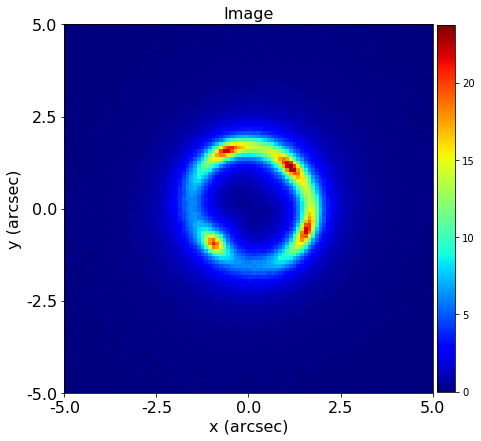

In [13]:
aplt.imaging.image(imaging=imaging)

Finally, lets output these files to.fits files, we'll begin to analyze them in the next tutorial!

The data path specifies where the data is output, this time in the directory 'chapter_path/data'

In [18]:
chapter_path = "/home/gera/Desktop/CERN/dark_matter/autolens_workspace/howtolens/chapter_1_introduction/"
chapter_path = (
    "/home/gera/Desktop/CERN/dark_matter/autolens_workspace/howtolens/chapter_1_introduction/"
)

In [19]:
dataset_path = chapter_path + "dataset/"

Now output our simulated data to hard-disk.

In [20]:
imaging.output_to_fits(
    image_path=dataset_path + "image.fits",
    noise_map_path=dataset_path + "noise_map.fits",
    psf_path=dataset_path + "psf.fits",
    overwrite=True,
)